In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [2]:
titanic = pd.read_csv('train.csv')

# Maybe the length or the values of these 2 can be used on some way
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket'],axis=1)

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [3]:
titanic['hasCabin'] = titanic['Cabin'].notna()
titanic = titanic.drop(['Cabin'], axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,hasCabin
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,True
2,1,3,female,26.0,0,0,7.9250,S,False
3,1,1,female,35.0,1,0,53.1000,S,True
4,0,3,male,35.0,0,0,8.0500,S,False


In [4]:
pd.get_dummies(titanic)

,Survived,Pclass,Age,SibSp,Parch,Fare,hasCabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,True,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,False,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,True,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,False,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,False,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,True,1,0,0,0,1
888,0,3,NaN,1,2,23.4500,False,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,True,0,1,1,0,0


In [5]:
df = pd.get_dummies(titanic)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   hasCabin    891 non-null    bool   
 7   Sex_female  891 non-null    uint8  
 8   Sex_male    891 non-null    uint8  
 9   Embarked_C  891 non-null    uint8  
 10  Embarked_Q  891 non-null    uint8  
 11  Embarked_S  891 non-null    uint8  
dtypes: bool(1), float64(2), int64(4), uint8(5)
memory usage: 47.1 KB


In [6]:
df[df['Age'].isna()].Survived.value_counts()

0    125
1     52
Name: Survived, dtype: int64

In [7]:
df[df['Age'].notna()].Survived.value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [8]:
df_age = df[df['Age'].notna()]
df_age_na = df[df['Age'].isna()]
df_noage = df_age_na.drop(['Age'],axis=1)

df_noage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 5 to 888
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    177 non-null    int64  
 1   Pclass      177 non-null    int64  
 2   SibSp       177 non-null    int64  
 3   Parch       177 non-null    int64  
 4   Fare        177 non-null    float64
 5   hasCabin    177 non-null    bool   
 6   Sex_female  177 non-null    uint8  
 7   Sex_male    177 non-null    uint8  
 8   Embarked_C  177 non-null    uint8  
 9   Embarked_Q  177 non-null    uint8  
 10  Embarked_S  177 non-null    uint8  
dtypes: bool(1), float64(1), int64(4), uint8(5)
memory usage: 9.3 KB


[9.29719968e-01 6.93661678e-02 3.21222915e-04 1.80395867e-04
 1.64896078e-04 1.16407809e-04 8.88039082e-05 2.44111075e-05
 1.74244606e-05 3.02015885e-07 1.32143435e-36]
[[-8.81503373e-03  2.84899244e-02  2.38578900e-03  3.28034161e-03
   9.99531379e-01  4.08886346e-03  1.67651052e-03 -1.67651052e-03
   2.18745744e-03 -2.30772336e-04 -2.00259800e-03]
 [-1.81959898e-02  9.99095750e-01 -2.09316919e-02 -1.25436512e-02
  -2.85597483e-02  6.06883870e-03 -3.77602029e-03  3.77602029e-03
   1.45534109e-04 -2.16963690e-04 -1.83790248e-04]
 [ 1.04308060e-01  2.64228179e-02  7.41184872e-01  6.39237666e-01
  -3.69532882e-03 -3.82526990e-02  1.09008380e-01 -1.09008380e-01
  -5.45793771e-02  9.35895221e-03  4.61820165e-02]
 [ 5.15731745e-01  1.03286750e-02  3.41487193e-01 -3.57902015e-01
   7.56106486e-03 -2.36797304e-01 -4.52202935e-01  4.52202935e-01
  -1.13313944e-01  1.26843744e-02  1.05359694e-01]
 [ 5.99952046e-01  7.56550621e-03 -5.52750404e-01  5.09012736e-01
   6.02688171e-03 -2.46956488e-01

Text(0, 0.5, 'cumulative explained variance')

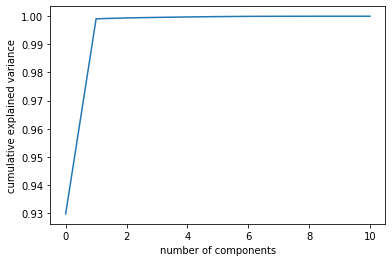

In [9]:
X = df_age.drop(['Survived'],axis=1)
y = df_age['Survived']

pca = PCA()

pca.fit(X,y)

print(pca.explained_variance_ratio_)
print(pca.components_)
print(f'cumsum: {np.cumsum(pca.explained_variance_ratio_)}')

pca = PCA().fit(X,y)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [10]:
X = df_age.drop(['Survived'],axis=1)
y = df_age['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

print(model.get_depth())
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

3
0.8336252189141856
0.8181818181818182


[9.95917651e-01 2.54287542e-03 5.42153061e-04 3.72532993e-04
 2.61381933e-04 2.05730753e-04 1.04946094e-04 5.27287884e-05
 5.97666814e-36 6.56372021e-37]
[[-1.20038154e-02  1.69594018e-02  3.69328623e-03  9.99760267e-01
   3.09169467e-03  2.08811490e-03 -2.08811490e-03  1.96527895e-03
  -3.21672189e-03  1.25144294e-03]
 [ 1.75547159e-01  9.47519334e-01  2.46805254e-01 -1.49447632e-02
  -4.13222782e-02  4.23361666e-02 -4.23361666e-02 -4.33482094e-02
  -1.10619090e-02  5.44101184e-02]
 [-4.44729305e-01  9.49731057e-02 -2.21165680e-02 -7.15944575e-03
   1.07424344e-01 -4.31647086e-01  4.31647086e-01 -7.96541041e-02
  -4.06804779e-01  4.86458884e-01]
 [ 7.47890275e-01 -9.31907816e-02 -7.83171179e-02  1.35700279e-02
  -2.40313383e-01 -4.26451287e-01  4.26451287e-01 -5.16210314e-02
   3.55285373e-02  1.60924941e-02]
 [-2.33115755e-01  1.28146537e-01  1.29401000e-02 -4.38605333e-03
  -1.92621442e-03 -2.69476297e-01  2.69476297e-01  6.31156507e-01
  -1.03960441e-02 -6.20760463e-01]
 [ 2.632251

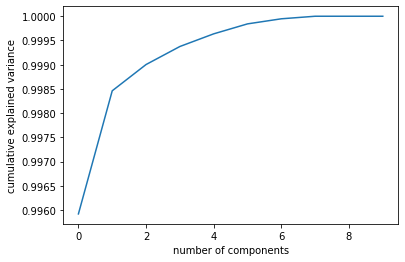

In [11]:
X = df_noage.drop(['Survived'],axis=1)
y = df_noage['Survived']

pca = PCA()

pca.fit(X,y)

print(pca.explained_variance_ratio_)
print(pca.components_)

pca = PCA().fit(X,y)
print(f'cumsum: {np.cumsum(pca.explained_variance_ratio_)}')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [12]:
X = df_noage.drop(['Survived'],axis=1)
y = df_noage['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

print(model.get_depth())
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

3
0.8581560283687943
0.8333333333333334


In [13]:
df.Age = df.Age.fillna(df.Age.mean())

In [14]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

print(model.get_depth())
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

3
0.8342696629213483
0.8212290502793296


In [15]:
titanic_test = pd.read_csv('test.csv')
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
